# Preparing the Data

In [ ]:
import sklearn
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
import statsmodels.api as sm

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from keras.utils import normalize, to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Daragh's Big Mad Joint Database.csv to Daragh's Big Mad Joint Database (4).csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded["Daragh's Big Mad Joint Database.csv"].decode('utf-8')))

df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

df

,Date,Bitcoin_price,Ethereum_price,Cardano_price,Ripple_price,S&P500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,Twitter_volume,Google_trends
0,2013-01-10,123.65499,0.000000,0.000000,0.000000,1695.000000,15191.70020,3817.979980,124.589996,20.410000,31.879999,2.646,102.040001,0,2.0
1,2013-02-10,125.45500,0.000000,0.000000,0.000000,1693.869995,15133.13965,3815.020020,127.059998,20.920000,32.360001,2.626,104.099998,0,2.0
2,2013-03-10,108.58483,0.000000,0.000000,0.000000,1678.660034,14996.48047,3774.340088,127.180000,20.920000,32.270000,2.606,103.309998,0,2.0
3,2013-04-10,118.67466,0.000000,0.000000,0.000000,1690.500000,15072.58008,3807.750000,126.529999,20.930000,32.400002,2.652,103.839996,0,2.0
4,2013-05-10,121.33866,0.000000,0.000000,0.000000,1690.500000,15072.58008,3807.750000,126.529999,20.930000,32.400002,2.652,103.839996,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,2021-02-22,54181.91465,1782.149591,1.095003,0.575107,3876.500000,31521.68945,13533.049810,169.509995,26.270000,14.350000,1.370,61.490002,0,NaN
2662,2021-02-23,48172.87748,1546.622961,0.926067,0.461140,3881.370117,31537.34961,13465.200200,169.119995,25.709999,14.440000,1.362,61.669998,0,NaN
2663,2021-02-24,48745.43298,1589.266801,1.025853,0.460246,3925.429932,31961.85938,13597.969730,169.000000,25.940001,14.640000,1.389,63.220001,0,NaN
2664,2021-02-25,48291.41208,1524.180606,1.106722,0.453069,3829.340088,31402.00977,13119.429690,165.820007,25.400000,14.540000,1.518,63.529999,0,NaN


In [ ]:
df1 = df[df.isna().any(axis=1)]
df1

,Date,Bitcoin_price,Ethereum_price,Cardano_price,Ripple_price,S&P500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,Twitter_volume,Google_trends
2661,2021-02-22,54181.91465,1782.149591,1.095003,0.575107,3876.500000,31521.68945,13533.04981,169.509995,26.270000,14.35,1.370,61.490002,0,NaN
2662,2021-02-23,48172.87748,1546.622961,0.926067,0.461140,3881.370117,31537.34961,13465.20020,169.119995,25.709999,14.44,1.362,61.669998,0,NaN
2663,2021-02-24,48745.43298,1589.266801,1.025853,0.460246,3925.429932,31961.85938,13597.96973,169.000000,25.940001,14.64,1.389,63.220001,0,NaN
2664,2021-02-25,48291.41208,1524.180606,1.106722,0.453069,3829.340088,31402.00977,13119.42969,165.820007,25.400000,14.54,1.518,63.529999,0,NaN
2665,2021-02-26,45752.11492,1435.724418,1.204905,0.424884,3811.149902,30932.36914,13192.34961,161.809998,24.660000,14.24,1.460,61.500000,0,NaN


In [ ]:
df = df.interpolate(method ='linear', axis=0, limit_direction ='forward', limit=5) 

In [ ]:
df.size

39990

In [ ]:
df.describe()

,Bitcoin_price,Ethereum_price,Cardano_price,Ripple_price,S&P500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,Twitter_volume,Google_trends
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,5061.133894,190.119903,0.037265,0.113516,2486.778548,21703.820064,6624.110475,128.107018,16.728998,17.923901,2.098906,58.029321,6289.723556,10.413728
std,7059.006196,290.000817,0.096850,0.164524,523.299866,4505.593346,2269.967181,19.284935,2.776803,6.527499,0.649049,19.603626,14914.970316,13.819754
min,108.584830,0.000000,0.000000,0.000000,1655.449951,14776.530270,3677.780029,100.500000,11.210000,7.930000,0.499000,-37.630001,0.000000,2.000000
25%,451.403323,0.000000,0.000000,0.000000,2057.264893,17634.740230,4830.470215,116.585001,14.920000,14.390000,1.767000,45.919998,0.000000,2.000000
50%,2142.984995,92.866552,0.000000,0.000000,2399.290039,21005.710940,6140.419922,122.099998,16.020000,15.610000,2.239000,53.154998,0.000000,7.000000
75%,8151.499635,258.638484,0.046656,0.250569,2853.567566,25740.730468,7863.265137,128.470001,17.860001,18.515000,2.560000,63.497501,0.000000,12.000000
max,57128.642610,1958.739190,1.204905,0.684358,3934.830078,31961.859380,14095.469730,193.889999,27.000000,34.310001,3.234000,107.260002,132408.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2666 non-null   datetime64[ns]
 1   Bitcoin_price   2666 non-null   float64       
 2   Ethereum_price  2666 non-null   float64       
 3   Cardano_price   2666 non-null   float64       
 4   Ripple_price    2666 non-null   float64       
 5   S&P500          2666 non-null   float64       
 6   DJI             2666 non-null   float64       
 7   NASDAQ          2666 non-null   float64       
 8   Gold            2666 non-null   float64       
 9   Silver          2666 non-null   float64       
 10  Commodities     2666 non-null   float64       
 11  T_Bill          2666 non-null   float64       
 12  Oil             2666 non-null   float64       
 13  Twitter_volume  2666 non-null   int64         
 14  Google_trends   2666 non-null   float64       
dtypes: d

In [ ]:
#sns.pairplot(df.dropna())

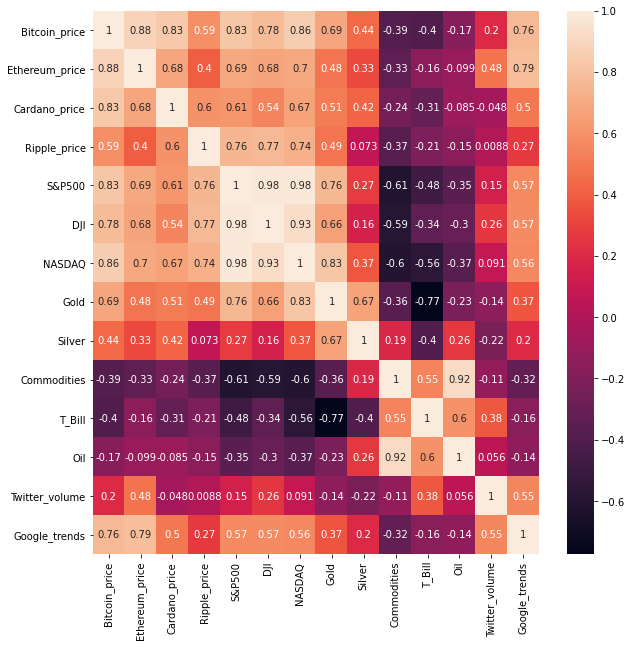

In [ ]:
# numerical correlation
plt.figure(figsize=(10,10))

corr = df.corr()
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df['Bitcoin_percentage_price_change'] = df['Bitcoin_price'].pct_change()
df['Bitcoin_actual_price_change'] = df['Bitcoin_price'].diff()

df

,Date,Bitcoin_price,Ethereum_price,Cardano_price,Ripple_price,S&P500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,Twitter_volume,Google_trends,Bitcoin_percentage_price_change,Bitcoin_actual_price_change
0,2013-01-10,123.65499,0.000000,0.000000,0.000000,1695.000000,15191.70020,3817.979980,124.589996,20.410000,31.879999,2.646,102.040001,0,2.0,NaN,NaN
1,2013-02-10,125.45500,0.000000,0.000000,0.000000,1693.869995,15133.13965,3815.020020,127.059998,20.920000,32.360001,2.626,104.099998,0,2.0,0.014557,1.80001
2,2013-03-10,108.58483,0.000000,0.000000,0.000000,1678.660034,14996.48047,3774.340088,127.180000,20.920000,32.270000,2.606,103.309998,0,2.0,-0.134472,-16.87017
3,2013-04-10,118.67466,0.000000,0.000000,0.000000,1690.500000,15072.58008,3807.750000,126.529999,20.930000,32.400002,2.652,103.839996,0,2.0,0.092921,10.08983
4,2013-05-10,121.33866,0.000000,0.000000,0.000000,1690.500000,15072.58008,3807.750000,126.529999,20.930000,32.400002,2.652,103.839996,0,2.0,0.022448,2.66400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,2021-02-22,54181.91465,1782.149591,1.095003,0.575107,3876.500000,31521.68945,13533.049810,169.509995,26.270000,14.350000,1.370,61.490002,0,72.0,-0.051581,-2946.72796
2662,2021-02-23,48172.87748,1546.622961,0.926067,0.461140,3881.370117,31537.34961,13465.200200,169.119995,25.709999,14.440000,1.362,61.669998,0,72.0,-0.110905,-6009.03717
2663,2021-02-24,48745.43298,1589.266801,1.025853,0.460246,3925.429932,31961.85938,13597.969730,169.000000,25.940001,14.640000,1.389,63.220001,0,72.0,0.011885,572.55550
2664,2021-02-25,48291.41208,1524.180606,1.106722,0.453069,3829.340088,31402.00977,13119.429690,165.820007,25.400000,14.540000,1.518,63.529999,0,72.0,-0.009314,-454.02090


In [ ]:
df['Bitcoin_inc_dec'] = np.where(df['Bitcoin_actual_price_change']>0, 1, 0)
df = df.iloc[1:]
df

,Date,Bitcoin_price,Ethereum_price,Cardano_price,Ripple_price,S&P500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,Twitter_volume,Google_trends,Bitcoin_percentage_price_change,Bitcoin_actual_price_change,Bitcoin_inc_dec
1,2013-02-10,125.45500,0.000000,0.000000,0.000000,1693.869995,15133.13965,3815.020020,127.059998,20.920000,32.360001,2.626,104.099998,0,2.0,0.014557,1.80001,1
2,2013-03-10,108.58483,0.000000,0.000000,0.000000,1678.660034,14996.48047,3774.340088,127.180000,20.920000,32.270000,2.606,103.309998,0,2.0,-0.134472,-16.87017,0
3,2013-04-10,118.67466,0.000000,0.000000,0.000000,1690.500000,15072.58008,3807.750000,126.529999,20.930000,32.400002,2.652,103.839996,0,2.0,0.092921,10.08983,1
4,2013-05-10,121.33866,0.000000,0.000000,0.000000,1690.500000,15072.58008,3807.750000,126.529999,20.930000,32.400002,2.652,103.839996,0,2.0,0.022448,2.66400,1
5,2013-06-10,120.65533,0.000000,0.000000,0.000000,1690.500000,15072.58008,3807.750000,126.529999,20.930000,32.400002,2.652,103.839996,0,2.0,-0.005632,-0.68333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,2021-02-22,54181.91465,1782.149591,1.095003,0.575107,3876.500000,31521.68945,13533.049810,169.509995,26.270000,14.350000,1.370,61.490002,0,72.0,-0.051581,-2946.72796,0
2662,2021-02-23,48172.87748,1546.622961,0.926067,0.461140,3881.370117,31537.34961,13465.200200,169.119995,25.709999,14.440000,1.362,61.669998,0,72.0,-0.110905,-6009.03717,0
2663,2021-02-24,48745.43298,1589.266801,1.025853,0.460246,3925.429932,31961.85938,13597.969730,169.000000,25.940001,14.640000,1.389,63.220001,0,72.0,0.011885,572.55550,1
2664,2021-02-25,48291.41208,1524.180606,1.106722,0.453069,3829.340088,31402.00977,13119.429690,165.820007,25.400000,14.540000,1.518,63.529999,0,72.0,-0.009314,-454.02090,0


Text(0, 0.5, 'Bitcoin Price (USD)')

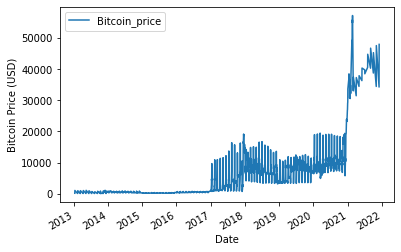

In [ ]:
ax = df.plot(x='Date', y='Bitcoin_price');
ax.set_xlabel("Date")
ax.set_ylabel("Bitcoin Price (USD)")

# Classification


In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

In [ ]:
X = df.drop(['Date','Bitcoin_percentage_price_change','Bitcoin_actual_price_change','Bitcoin_inc_dec','Bitcoin_price'], axis=1)
Y = df['Bitcoin_inc_dec']

In [ ]:
X.shape

(2665, 13)

In [ ]:
X.size

34645

In [ ]:
Y.shape

(2665,)

In [ ]:
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, Y, test_size=0.20)

In [ ]:
norm_scaler = MinMaxScaler()

X_train = norm_scaler.fit_transform(X_train)
X_test = norm_scaler.fit_transform(X_validation)

In [ ]:
# encode class values as integers
encoder = LabelEncoder()

encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

encoder.fit(y_validation)
encoded_Y_val = encoder.transform(y_validation)

In [ ]:
class_names = ["Increase", "Decrease"]

In [ ]:
class_names[encoded_Y[0]]

'Decrease'

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(2475, activation="elu"),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(1, activation="sigmoid")
                                 ])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dropout_2 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2475)              34650     
_________________________________________________________________
dropout_3 (Dropout)          (None, 2475)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2476      
Total params: 37,308
Trainable params: 37,308
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
from keras import callbacks 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 10,  
                                        restore_best_weights = True) 

history = model.fit(X_train, encoded_Y, epochs=100,
    batch_size=128,
    validation_split=0.2,
    verbose = 1,
    shuffle=True,
    callbacks = [earlystopping])

Epoch 1/100
14/14 [==============================] - 1s 26ms/step - loss: 0.6915 - accuracy: 0.5240 - val_loss: 0.6957 - val_accuracy: 0.5176
Epoch 2/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6870 - accuracy: 0.5552 - val_loss: 0.6925 - val_accuracy: 0.5176
Epoch 3/100
14/14 [==============================] - 0s 16ms/step - loss: 0.6887 - accuracy: 0.5510 - val_loss: 0.6933 - val_accuracy: 0.5176
Epoch 4/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6888 - accuracy: 0.5382 - val_loss: 0.6946 - val_accuracy: 0.5176
Epoch 5/100
14/14 [==============================] - 0s 14ms/step - loss: 0.6906 - accuracy: 0.5409 - val_loss: 0.6951 - val_accuracy: 0.5176
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 0.6866 - accuracy: 0.5501 - val_loss: 0.6932 - val_accuracy: 0.5176
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 0.6851 - accuracy: 0.5544 - val_loss: 0.6928 - val_accuracy: 0.5246
Epoch 

In [ ]:
_, accuracy = model.evaluate(X_train, encoded_Y)
print('Accuracy: %.2f' % (accuracy*100))

67/67 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5389
Accuracy: 53.89


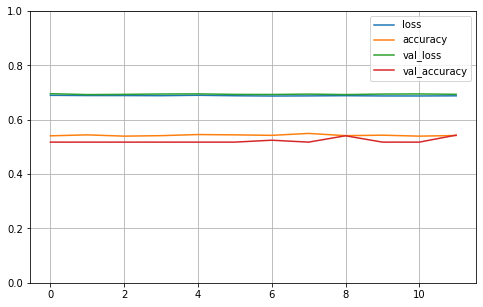

In [ ]:
# Training Curve

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_validation, encoded_Y_val)

17/17 [==============================] - 0s 2ms/step - loss: 186.5127 - accuracy: 0.5535


[186.5127410888672, 0.5534709095954895]

In [ ]:
X_new = X_validation[:7]
y_proba = model.predict(X_new)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([['Decrease'],
       ['Decrease'],
       ['Decrease'],
       ['Decrease'],
       ['Decrease'],
       ['Decrease'],
       ['Decrease']], dtype='<U8')

# Regression

In [ ]:
y1 = np.array(df['Bitcoin_price'])

Ethereum_price = pd.Series(df['Ethereum_price'])
Cardano_price = pd.Series(df['Cardano_price'])
Ripple_price = pd.Series(df['Ripple_price'])
SP500 = pd.Series(df['S&P500'])
DJI = pd.Series(df['DJI'])
NASDAQ = pd.Series(df['NASDAQ'])
Gold = pd.Series(df['Gold'])
Silver = pd.Series(df['Silver'])
Commodities = pd.Series(df['Commodities'])
T_Bill = pd.Series(df['T_Bill'])
Oil = pd.Series(df['Oil'])
Twitter_volume = pd.Series(df['Twitter_volume'])
Google_trends = pd.Series(df['Google_trends'])


x1 = np.column_stack((Ethereum_price,Cardano_price,Ripple_price,SP500,DJI,NASDAQ,Gold,Silver,Commodities,T_Bill,Oil,
                      Twitter_volume,Google_trends))

x1 = sm.add_constant(x1, prepend=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1, test_size=0.20)

y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))

xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))

xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))

ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))

yval_scale=scaler_y.transform(y_val)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
model = Sequential()
model.add(Dense(14, input_dim=14, kernel_initializer='normal', activation='relu'))
model.add(Dense(2283, activation='elu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_13 (Dense)             (None, 2283)              34245     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2284      
Total params: 36,739
Trainable params: 36,739
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=256, validation_split=0.2)


Epoch 1/30
7/7 [==============================] - 1s 44ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0409 - val_loss: 5.7818e-04 - val_mse: 5.7818e-04 - val_mae: 0.0145
Epoch 2/30
7/7 [==============================] - 0s 19ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0276 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0279
Epoch 3/30
7/7 [==============================] - 0s 18ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0277 - val_loss: 9.9058e-04 - val_mse: 9.9058e-04 - val_mae: 0.0255
Epoch 4/30
7/7 [==============================] - 0s 17ms/step - loss: 8.9574e-04 - mse: 8.9574e-04 - mae: 0.0229 - val_loss: 7.0170e-04 - val_mse: 7.0170e-04 - val_mae: 0.0204
Epoch 5/30
7/7 [==============================] - 0s 17ms/step - loss: 6.6822e-04 - mse: 6.6822e-04 - mae: 0.0185 - val_loss: 5.4828e-04 - val_mse: 5.4828e-04 - val_mae: 0.0162
Epoch 6/30
7/7 [==============================] - 0s 20ms/step - loss: 5.2599e-04 - mse: 5.2599e-04 - mae: 0.0152 - val_loss: 3.7642e-04 - val_mse:

In [ ]:
predictions = model.predict(xval_scale)

In [ ]:
mse_test = model.evaluate(xval_scale, yval_scale)

# Data is normalised hence a mae of 0.036 will actually be much larger in practice

17/17 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0357


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


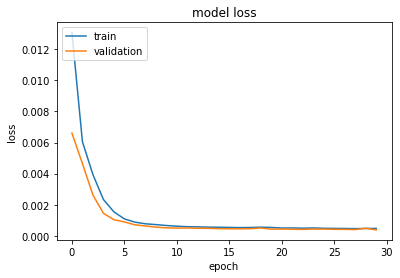

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[-6.39977234e+02],
       [ 4.88647064e+02],
       [ 1.19047005e+02],
       [ 4.54127502e+01],
       [-9.66630325e+01],
       [-9.34314636e+02],
       [-1.79996106e+03],
       [ 8.29101562e+03],
       [-1.11797714e+02],
       [ 7.73718896e+03],
       [ 7.06547314e+03],
       [ 4.17478555e+04],
       [ 1.74392402e+04],
       [ 1.02525947e+04],
       [-1.13122391e+02],
       [ 5.13015283e+03],
       [ 4.34096729e+03],
       [ 4.14356055e+03],
       [ 5.44062402e+03],
       [ 1.76860498e+03],
       [ 2.62382715e+04],
       [ 6.19998633e+03],
       [ 5.42039368e+02],
       [ 5.22653992e+02],
       [ 6.82361621e+03],
       [ 5.06019189e+03],
       [ 8.93142676e+03],
       [ 6.87217773e+02],
       [-9.10586182e+02],
       [ 2.02774829e+03],
       [ 7.37106812e+02],
       [-2.68275665e+02],
       [-1.82930496e+02],
       [-5.16475037e+02],
       [ 2.47149316e+04],
       [-8.30372986e+02],
       [-9.64749146e+02],
       [-6.53147888e+02],
       [-4.3

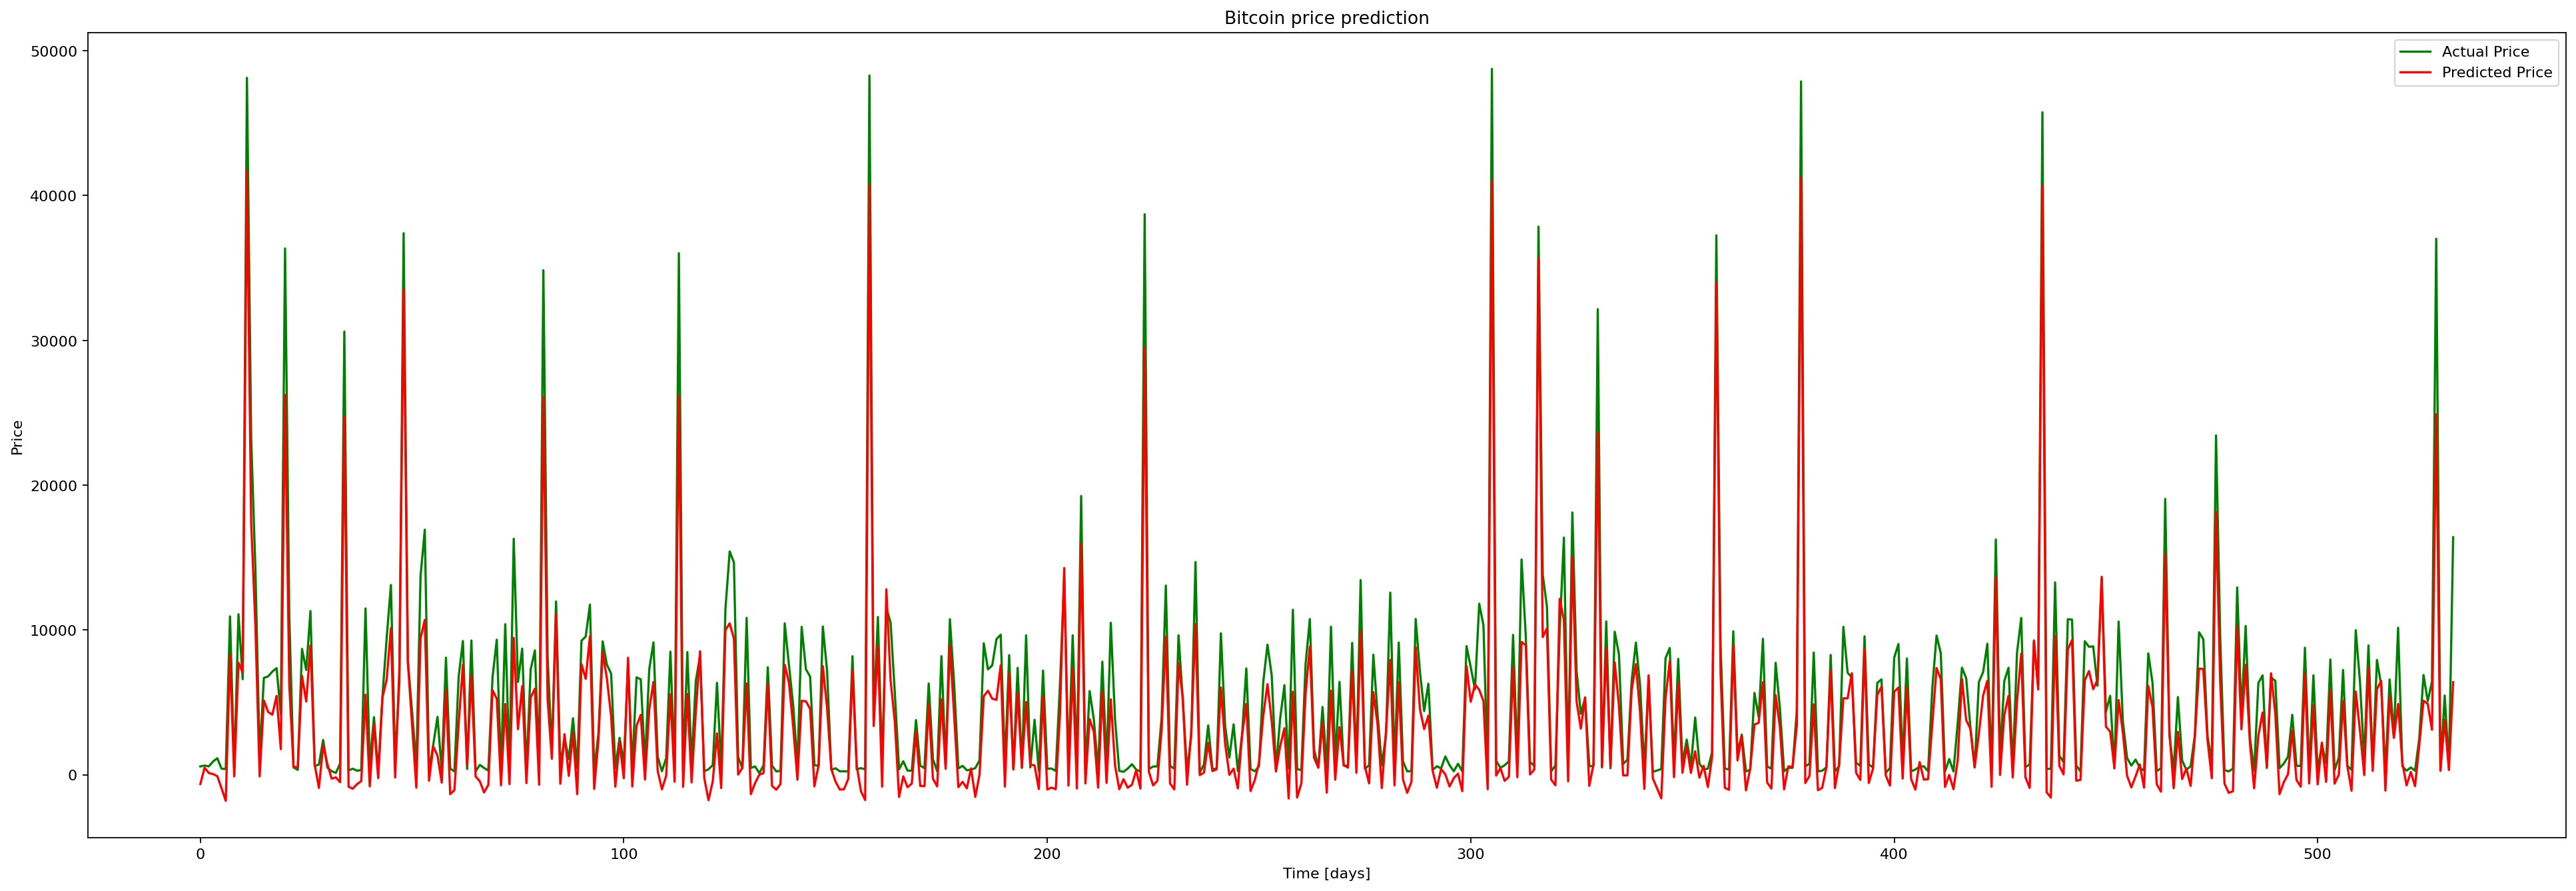

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 10), dpi=160, facecolor='w', edgecolor='k')

plt.plot(y_val, label="Actual Price", color='green')
plt.plot(predictions, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();